### Extract coordinates, cloud points and skeletons
script by maria, based on Seb's code and the navis library

To extract coordinates for each cell type instead of using the soma coordinates as the fafb library gives, Seb takes the coordinates of all synapses from the function fetch_synapses. Then I get a cloud of points (in the script from the neuron_inputs df) while using the combine_xyz function from Seb and he calculates the mean of all these and gets the centroid of the cloud. Careful! For neurons with mutliple dendritic trees I need to filter through neuropile of interest (eg medulla, lobula etc). The library doesn’t account for different neuropile layers. This I can fix with PCA. The script is called update_table_or_file (B3 section)
add asdf so that pandas is forced to read the excel as string, then drop the first line

Here I can download cells, and skeletons. Since cells can be slow to work with you can either downsample them or instead work with skeletons!
https://fafbseg-py.readthedocs.io/en/latest/source/tutorials/flywire_neurons.html


If the skeleton is not precomputed, I need to do it myself hehe


navis, is a library for general neuroanatomical analyses and visualisation


x/y/z coordinates typically vary by a micron or so between original FAFB (also called “FAFB v14” or just “FAFB14”) and FlyWire

Use the navis library : https://navis.readthedocs.io/en/latest/source/gallery.html#example-gallery
and matplotlib

In [1]:
### Import all relevant packages
import os
from glob import glob
import pandas as pd
import fafbseg
from fafbseg import flywire 
import navis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [ ]:
# load T4 dataset
path = r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
filename = glob(path +"\\"+"*.xlsx")
#dataset = pd.read_excel(filename)
# what is most efficient? Load all excels in a list and then choose? or one by one?
excel_list  = []
for i in filename:
    print(f'Importing:{i}')
    excelPath = os.path.join(path,i)
    df = pd.read_excel(excelPath)
    excel_list.append(df)

In [ ]:
#Selecting postsynaptic neuron of interest
neuron = 'Mi1'
neuron_df = db_R[db_R['symbol'] == neuron].copy()

#Filtering for valid segment ids based on a given criteria
neuron_selected_df = neuron_df.copy()
neuron_selected_df = neuron_selected_df.copy() # but I will just take all MI
# neuron_selected_df[neuron_selected_df['backbone proofread (Y/N)'] == 'Y'].copy()
neuron_selected_df = neuron_selected_df.copy() # Temp just for C3 neuron_selected_df.iloc[:135].copy()
#neuron_selected_df = neuron_selected_df[neuron_selected_df['inputs_proofread (Y/N)'] == 'N'].copy()

print(f'\n\nTotal number of postsynaptic cells: {len(neuron_selected_df)}\n\n')

ID_ls = neuron_selected_df['Updated_seg_id'].tolist()

### Load Dataset : T4 neurons list (start with just 10 cells)
then find presynapses but based on IDs -> just Mi1, Tm3, Mi9, Mi4, TmY15

#### Cloud of coordinates of synapses of the (presynaptic partners  - maybe i cannot differentiate)

In [ ]:
######################## Here get coordinates ########################################################################
# Important to fetch synapses from live materialization (mat = "auto")
new_segmentsIDs_ls
post_synapses = flywire.synapses.fetch_synapses(new_segmentsIDs_ls, pre=False, post=True, attach=True, 
                                         min_score=50, clean=True, transmitters=False, 
                                         neuropils=True, batch_size=30,
                                         dataset='production', progress=True,mat="live")

#Combining x,y,z columns for future purposes
check = combine_xyz(post_synapses)

In [ ]:
check

In [ ]:
##################### how to save coordinates per cell type per T4? ####################################################

In [ ]:
#################### Filter dataset of T4 inputs to these presynaptic partners: Mi4, Mi9, CT1, Tm3, Mi1, C3 #############

In [ ]:
################### Visualize in 3D the T4 dendrites ####################################################################

In [ ]:
################## Use plt.scatterplot to plot the points of the synapses, colorcoded pair cell type #############################

#### Get centroids of these clouds of synapses per cell type

In [ ]:
################ Get the centroids of these clouds of points and save coordinates in the database ##############################

#### Draw Vectors on triples (& doublets)

1. First, define combinations of triplets and duplets
2. Draw vectors through 3/2 centroids



In [ ]:
################ Draw vectors ##########################################

#### Draft to learn the navis library

In [27]:
def combine_xyz(df):
    """
    Combines separated x, y and z column into one, changes units and adds new column names for
    generating a neuroglancer link with function nglui.statebuilder.helpers.make_synapse_neuroglancer_link

    Args:
        pandas data frame containing x,y and z as columns of the same length

    Returns:
        same pandas data frame containing a new column with [x/4,y/4,z/40] lists
    """
    # Generating the single column

    post_pt_position = []
    for x,y,z in zip(df['post_x'].tolist(),df['post_y'].tolist(),df['post_z'].tolist()):
        temp_ls = [x/4,y/4,z/40]
        post_pt_position.append(temp_ls)

    pre_pt_position = []
    for x,y,z in zip(df['pre_x'].tolist(),df['pre_y'].tolist(),df['pre_z'].tolist()):
        temp_ls = [x/4,y/4,z/40]
        pre_pt_position.append(temp_ls)

    #Adding new columns and names
    df['post_pt_position'] = post_pt_position
    df['pre_pt_position'] = pre_pt_position
    #Changing column names
    df.rename(columns={'pre': 'pre_pt_root_id', 'post': 'post_pt_root_id'}, inplace=True)

In [33]:
######################## Here get coordinates ####################################

##### Presynaptic partners of T4 cells #####

# Important to fetch synapses from live materialization (mat = "auto")
### insert list of neurons of interest : T4
### by use of the same T4 input excel file (no updating of cell_IDs)
path = r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
filename = glob(path +"\\"+"*.xlsx")
#dataset = pd.read_excel(filename)
# what is most efficient? Load all excels in a list and then choose? or one by one?
excel_list  = []
for i in filename:
    print(f'Importing:{i}')
    excelPath = os.path.join(path,i)
    df = pd.read_excel(excelPath)
    excel_list.append(df)

### Combine all 4 subtypes identified in FAFB in one DataFrame: db
db = pd.concat(excel_list)
print(f'\n\nCell types in the database: {db.symbol.unique()}, total = {len(db.symbol.unique())}')
cell_type_of_interest = db['postsynaptic_ID'].unique().tolist()

neurons_inputs = flywire.synapses.fetch_synapses(cell_type_of_interest, pre=False, post=True, attach=True, 
                                         min_score=50, clean=True, transmitters=False, 
                                         neuropils=True, batch_size=30,
                                         dataset='production', progress=True,mat="latest")

#Combining x,y,z columns for future purposes
#combine_xyz(neurons_inputs)

Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx


Cell types in the database: ['CT1' 'Mi1' 'Mi9' 'Tm3' nan 'T4a' 'Mi4' 'TmY15' 'C3' 'T4c' 'T4d' 'T4b'
 'Mi10' 'C2' 'Pm1_Tm2' 'Pm3' 'Tm2' 'PS125' 'Me-Lo-2-N.I.' 'Pm1a_Tm1'
 'TmY17' 'Dm10' 'T3' 'Pm1_Tm1' 'Pm1a_Mi1' 'Tm9' 'Tm1' 'Tm20' 'TmY10' 'Tm4'
 'Mi13' 'Pm4' 'Pm2' 'Tm16' 'ML1' 'Tm4a'], total = 36
Some root IDs were already outdated at materialization 855 and synapse/connectivity data will be inaccurrate:

 720575940639500963, 720575940615512898, 720575940629856556, 72057594063273610

Fetching synapses:   0%|          | 0/103 [00:00<?, ?it/s]

Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please up

In [34]:
neurons_inputs

,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id,neuropil
0,720575940626310221,720575940638662708,143,762240,283432,209720,762248,283540,209720,11337208,LOP_L
1,720575940610531011,720575940624535590,104,773688,246936,209640,773616,246836,209600,12341489,LOP_L
2,720575940614658814,720575940623458348,133,756220,208756,186040,756140,208880,186080,185520472,ME_L
3,720575940614658814,720575940623458348,147,756172,208756,186080,756136,208844,186120,185520479,ME_L
4,720575940620047553,720575940629305347,140,714872,315224,193040,714792,315168,193040,56963787,LOP_L
...,...,...,...,...,...,...,...,...,...,...,...
1069200,720575940636930423,720575940630298615,147,740328,202156,207080,740272,202076,207080,130962937,LOP_L
1069201,720575940636930423,720575940630298615,143,740268,202220,207280,740200,202176,207280,130962944,LOP_L
1069202,720575940626381564,720575940623382506,68,748392,246080,148160,748280,246104,148120,68633643,ME_L
1069203,720575940626381564,720575940623382506,77,748440,246072,148160,748328,246108,148160,68633650,ME_L


In [ ]:
#Counting inputs per ID, option joining dataframes
final_input_df = pd.DataFrame()
for n in neurons_inputs['post'].unique():
    inputs_count = {} # creates an empty dictionary
    curr_inputs = neurons_inputs[neurons_inputs['post'] == n]
    inputs_str = curr_inputs.applymap(str)
    
    for c in inputs_str['pre'].to_list():
        inputs_count[c] = inputs_count.get(c, 0) + 1 # access the dictionary with c as key
    input_count_df = pd.DataFrame(inputs_count, index=[0])
    input_count_df = input_count_df.T
    input_count_df.rename(columns={0: "counts"},inplace=True)
    input_count_df.index.names = ['presynaptic_ID']
    input_count_df = input_count_df.sort_values(by="counts",ascending=False)
    input_count_df['postsynaptic_ID'] = inputs_str['post'].to_list()[0:len(input_count_df)]
    final_input_df = final_input_df.append(input_count_df)
    #print(f'Counting done for: {n}')
input_count_str_df = final_input_df.applymap(str)
print('INPUTS: ')
display(input_count_str_df.head())
## For INPUTS


# Selecting dataframe
#Updating the IDs via Fafbseg
partner_ID = input_count_str_df.index.tolist()
updated_ID_df = fafbseg.flywire.update_ids(partner_ID, stop_layer=2, supervoxels=None, timestamp=None, dataset='production', progress=True)
partner_ID_ls = updated_ID_df["new_id"].tolist()

# Identifying user-based annotations about cell identity

identification_df = fafbseg.flywire.find_celltypes(partner_ID_ls, user=None, exact=False, case=False, regex=True, update_roots=False)
identification_no_duplicates_df = identification_df.drop_duplicates(subset='pt_root_id', keep='last', inplace=False, ignore_index=False).copy()

# Adding info to the current data set

# Selecting dataframes and resetting index
source_df = identification_no_duplicates_df.copy()
source_df.reset_index(inplace = True, drop = True)
target_df = input_count_str_df.copy()
target_df.reset_index(inplace = True, drop = True)


# Adding columns for the function to properly work
target_df['presynaptic_ID'] = input_count_str_df.index.astype(str)
source_df['presynaptic_ID'] = identification_no_duplicates_df['pt_root_id'].tolist()
target_df['guess'] = None
source_df['guess'] = identification_no_duplicates_df['tag'].tolist()
target_df['author'] = None
source_df['author'] = identification_no_duplicates_df['user_id'].tolist()

# Function inputs
source_cols = ['guess', 'author','presynaptic_ID']
target_cols = ['guess', 'author', 'presynaptic_ID']
reference_column = 'presynaptic_ID'

source_df = source_df[source_cols].copy()
target_df = target_df[source_cols].copy()

source_df = source_df.astype(str)
target_df = target_df.astype(str)


# Running the function and completing the dataset
result_input_df = update_dataframe_single_column(source_df, target_df,reference_column)
result_input_df['counts'] = input_count_str_df['counts'].tolist()
result_input_df['postsynaptic_ID'] = input_count_str_df['postsynaptic_ID'].tolist()
result_input_df.head()

In [29]:
### Now make the final dataframe with all additional information


,pre_pt_root_id,post_pt_root_id,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id,neuropil,post_pt_position,pre_pt_position
0,720575940626310221,720575940638662708,143,762240,283432,209720,762248,283540,209720,11337208,LOP_L,"[190562.0, 70885.0, 5243.0]","[190560.0, 70858.0, 5243.0]"
1,720575940610531011,720575940624535590,104,773688,246936,209640,773616,246836,209600,12341489,LOP_L,"[193404.0, 61709.0, 5240.0]","[193422.0, 61734.0, 5241.0]"
2,720575940614658814,720575940623458348,133,756220,208756,186040,756140,208880,186080,185520472,ME_L,"[189035.0, 52220.0, 4652.0]","[189055.0, 52189.0, 4651.0]"
3,720575940614658814,720575940623458348,147,756172,208756,186080,756136,208844,186120,185520479,ME_L,"[189034.0, 52211.0, 4653.0]","[189043.0, 52189.0, 4652.0]"
4,720575940620047553,720575940629305347,140,714872,315224,193040,714792,315168,193040,56963787,LOP_L,"[178698.0, 78792.0, 4826.0]","[178718.0, 78806.0, 4826.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069201,720575940636930423,720575940630298615,147,740328,202156,207080,740272,202076,207080,130962937,LOP_L,"[185068.0, 50519.0, 5177.0]","[185082.0, 50539.0, 5177.0]"
1069202,720575940636930423,720575940630298615,143,740268,202220,207280,740200,202176,207280,130962944,LOP_L,"[185050.0, 50544.0, 5182.0]","[185067.0, 50555.0, 5182.0]"
1069203,720575940636930423,720575940612796330,92,734000,196720,209480,734108,196720,209440,11971370,LOP_L,"[183527.0, 49180.0, 5236.0]","[183500.0, 49180.0, 5237.0]"
1069204,720575940626381564,720575940623382506,68,748392,246080,148160,748280,246104,148120,68633643,ME_L,"[187070.0, 61526.0, 3703.0]","[187098.0, 61520.0, 3704.0]"


In [ ]:
# Via Fafbseg (preferred)
url_list = []
for pre, post in zip(new_pre_ID_ls,new_post_ID_ls):
    if pre == 'INPUTS PROOFREAD': # skiping this row for now
        url_list.append('NEXT_PAIR')
        continue

    synapses = flywire.synapses.fetch_synapses(post,
                        pre=False, post=True, attach=True,
                        min_score=50, clean=True, transmitters=False,
                        neuropils=True, batch_size=30,
                        dataset='production', progress=True,mat="live")


    synapses = synapses[synapses['pre'] == pre]
    #Combining x,y,z columns for future purposes
    combine_xyz(synapses)
    # Getting URL
    url = make_synapse_neuroglancer_link(synapses, client,
            point_column='post_pt_position',return_as="url")
    url_list.append(url)

In [ ]:
# Getting the synapses location and generating URL (NOT CLEAN)
import caveclient
from nglui.statebuilder.helpers import make_synapse_neuroglancer_link

client = caveclient.CAVEclient("flywire_fafb_production")

pre_list = syn_neuropile_df ['pre_pt_root_id'].tolist()
post_list = syn_neuropile_df ['post_pt_root_id'].tolist()

synapses = client.materialize.synapse_query(
        pre_ids = pre_list, post_ids = post_list,
        bounding_box_column='pre_pt_position'
        )

url = make_synapse_neuroglancer_link(synapses, client, point_column='pre_pt_position')
display(url)

In [2]:
lop = flywire.get_neuropil_volumes(['LOP_L', 'LOP_R'])

In [6]:
nl = navis.example_neurons(kind='skeleton')
#nl= flywire.get_mesh_neuron(720575940623208376)

# Load volumes
vols = [flywire.get_neuropil_volumes(['LOP_R'])]
fig = navis.plot3d([nl, *vols], backend='plotly')

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_v

In [7]:
fig = nl.plot3d()

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning:

invalid value encountered in cast

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning:

invalid value encountered in cast

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning:

invalid value encountered in cast

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning:

invalid value encountered in cast

c:\Users\mioannid\Miniconda3\envs\connectome\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning:

invalid value encountered in cast



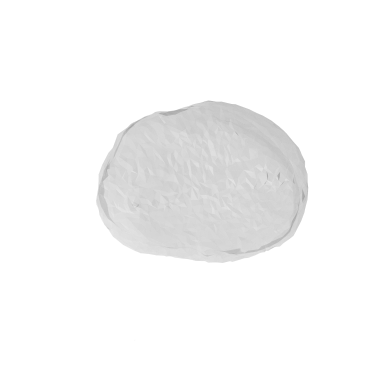

In [23]:
########### Here is how to plot the right optic lobe


mesh_azim_R = 16# -18 for ME_R, 16 for ME_L
mesh_elev_R = -50 # -148 for ME_R, -50 for ME_L    ######### where do these numbers come from?
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
mesh_OL_R = 'ME_L' # This is correct for fafbseq version 1.14.0 and before 
OL_R = flywire.get_neuropil_volumes([mesh_OL_R]) #['ME_R','LO_R','LOP_R']
navis.plot2d([OL_R], method='3d_complex', ax=ax,view=(12,2),scalebar = '10 um')
ax.azim= mesh_azim_R
ax.elev= mesh_elev_R

In [1]:
############################# From Cornean_Molina et al #################################################################    
# Cluster Visualization on the Medulla
    OL_labels = [string.split(":")[2] for string in data_df.index]
    ids= database_df["optic_lobe_id"]


    xyz = np.zeros([len(OL_labels),3])
    for idx, neuron in enumerate(OL_labels):
        df_loc = np.where(ids==neuron)[0]
        coordinate = database_df.iloc[df_loc]["XYZ-ME"].to_numpy(dtype=str, copy=True)
        xyz[idx,:] = np.array([coordinate[0].split(',')],dtype=float)
    xyz *=[4,4,40] # For plotting it using navis

    ##
    mesh_OL_L = 'ME_R' # This is correct for fafbseq version 1.14.0 and before 
    mesh_OL_R = 'ME_L' # This is correct for fafbseq version 1.14.0 and before 
    mesh_azim_L = -18# -18 for ME_R, 16 for ME_L
    mesh_elev_L = -148 # -148 for ME_R, -50 for ME_L
    mesh_azim_R = 16# -18 for ME_R, 16 for ME_L
    mesh_elev_R = -50 # -148 for ME_R, -50 for ME_L

    OL_R = flywire.get_neuropil_volumes([mesh_OL_R]) #['ME_R','LO_R','LOP_R']
    OL_L = flywire.get_neuropil_volumes([mesh_OL_L]) #['ME_R','LO_R','LOP_R']

    fig = plt.figure()
    ax  = fig.add_subplot(projection='3d')
    navis.plot2d([OL_R], method='3d_complex', ax=ax,view=(12, 2),scalebar = '10 um')
    ax.scatter(xyz[kmeans.labels_==0,0],xyz[kmeans.labels_==0,1],xyz[kmeans.labels_==0,2],'.',linewidth=0,s=15,color=[228/255,26/255,28/255,0.8],label='Cluster 1')
    ax.scatter(xyz[kmeans.labels_==1,0],xyz[kmeans.labels_==1,1],xyz[kmeans.labels_==1,2],'.',linewidth=0,s=15,color=[55/255,126/255,184/255,0.8],label='Cluster 2')
    ax.azim= mesh_azim_R
    ax.elev= mesh_elev_R
    fig.suptitle(f"Clusters on the R medulla")
    fig.savefig(os.path.join(fig_save_path,f'Location_KmeanClusters_R_{_sheet}.pdf'))
    plt.close()

    fig = plt.figure()
    ax  = fig.add_subplot(projection='3d')
    navis.plot2d([OL_L], method='3d_complex', ax=ax,view=(12, 2),scalebar = '10 um')
    ax.scatter(xyz[kmeans.labels_==0,0],xyz[kmeans.labels_==0,1],xyz[kmeans.labels_==0,2],'.',linewidth=0,s=15,color=[228/255,26/255,28/255,0.8],label='Cluster 1')
    ax.scatter(xyz[kmeans.labels_==1,0],xyz[kmeans.labels_==1,1],xyz[kmeans.labels_==1,2],'.',linewidth=0,s=15,color=[55/255,126/255,184/255,0.8],label='Cluster 2')
    ax.azim= mesh_azim_L
    ax.elev= mesh_elev_L
    fig.suptitle(f"Clusters on the L medulla")
    fig.savefig(os.path.join(fig_save_path,f'Location_KmeanClusters_L_{_sheet}.pdf'))
    plt.close()

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,599
n_leafs,618
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [4]:
#Function
def find_center_point(points, threshold):
    if isinstance(points, list):
        points = np.array(points)

    # Calculate the distances between each point and all other points
    distances = np.linalg.norm(points[:, np.newaxis] - points, axis=2)

    # Calculate the average distance for each point
    avg_distances = np.mean(distances, axis=1)

    # Find the indices of points within the threshold distance
    valid_indices = np.where(avg_distances < threshold)[0]

    # Check if there are any valid points
    if len(valid_indices) > 0:
        # Calculate the geometric center of valid points
        center_point = np.mean(points[valid_indices], axis=0)
        #Rounding
        center_point = np.round(center_point, decimals=1)
        
        # Find the closest point to the center
        closest_point_index = np.argmin(np.linalg.norm(points[valid_indices] - center_point, axis=1))
        closest_point = points[valid_indices][closest_point_index]
    else:
        center_point = np.array([0,0,0])
        closest_point = np.array([0,0,0])

    return center_point.tolist(), closest_point.tolist()

In [26]:
def combine_xyz(df):
    """
    Combines separated x, y and z column into one, changes units and adds new column names for
    generating a neuroglancer link with function nglui.statebuilder.helpers.make_synapse_neuroglancer_link

    Args:
        pandas data frame containing x,y and z as columns of the same length

    Returns:
        same pandas data frame containing a new column with [x/4,y/4,z/40] lists
    """
    # Generating the single column

    post_pt_position = []
    for x,y,z in zip(df['post_x'].tolist(),df['post_y'].tolist(),df['post_z'].tolist()):
        temp_ls = [x/4,y/4,z/40]
        post_pt_position.append(temp_ls)

    pre_pt_position = []
    for x,y,z in zip(df['pre_x'].tolist(),df['pre_y'].tolist(),df['pre_z'].tolist()):
        temp_ls = [x/4,y/4,z/40]
        pre_pt_position.append(temp_ls)

    #Adding new columns and names
    df['post_pt_position'] = post_pt_position
    df['pre_pt_position'] = pre_pt_position
    #Changing column names
    df.rename(columns={'pre': 'pre_pt_root_id', 'post': 'post_pt_root_id'}, inplace=True)

In [17]:
#Loading postsynaptic coordinated for each neuron in a specific neuropile and getting the center point
#The loop can take quite a lot of time depending on the ammount of ids!


#Looping for several rounds of X (e.g, 100)
rounds_of = 100
loop_number = 1 # Must start at "1" if not run before
start_point = (rounds_of*loop_number) - rounds_of
 
#Shortening the df to priorize id:

#short_df = df[(df['detached_lamina (Y/N)'] == 'N') &(df['inputs_proofread (Y/N)'] == 'Y')].copy()
short_df = df[df['XYZ-ME'] == 'nan'].copy()

NameError: name 'df' is not defined

In [18]:

## Testing function with some manually inserted dots
import numpy as np
import matplotlib.pyplot as plt

# Example XYZ coordinates
points = [
    [66659, 85714, 5406],
    [66885, 85749, 5367],
    [67124, 86454, 5390],
    [67664, 86251, 5434],
    [67273, 85576, 5497],
    [66399, 85482, 5428],
    [66803, 85360, 5477],
    [66505, 85552, 5413],
    [66772, 85838, 5450],
    [66496, 85540, 5402],
    [72452, 82402, 5694],
    [75373, 80809, 5808]
]

points = neurons_inputs_LO['post_pt_position'].tolist()

# Convert the points to a NumPy array
points = np.array(points)

# Set the threshold distance to exclude outliers
threshold = 5000

# Find the center point
center_point, closest_point  = find_center_point(points, threshold)

if center_point is not None:
    print("Center Point:", center_point)
else:
    print("No valid points within the threshold.")

# Plotting the points and center point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='y', label='Points')

# Scatter plot for the center point
if center_point is not None:
    ax.scatter(center_point[0], center_point[1], center_point[2], c='r', marker='x', label='Center Point')
    ax.scatter(closest_point [0], closest_point [1], closest_point [2], c='b', marker='x', label='closest_point')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

NameError: name 'neurons_inputs_LO' is not defined